In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#Loading the dataset
df = pd.read_csv('Bank_Marketing_Original_Data.csv')

In [3]:
df.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,contact,Day,Month,Duration,Campaign,Pdays,Previous,poutcome,TARGET
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# check the df structe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        45211 non-null  int64 
 1   Job        45211 non-null  object
 2   Marital    45211 non-null  object
 3   Education  45211 non-null  object
 4   Default    45211 non-null  object
 5   Balance    45211 non-null  int64 
 6   Housing    45211 non-null  object
 7   Loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   Day        45211 non-null  int64 
 10  Month      45211 non-null  object
 11  Duration   45211 non-null  int64 
 12  Campaign   45211 non-null  int64 
 13  Pdays      45211 non-null  int64 
 14  Previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  TARGET     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# find number of rows and column
df.shape

(45211, 17)

In [6]:
df.describe()

,Age,Balance,Day,Duration,Campaign,Pdays,Previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [48]:
# Check unique categories in each categorical feature to detect data consistency and plan encoding
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

Job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Marital
['married' 'single' 'divorced']
Education
['tertiary' 'secondary' 'unknown' 'primary']
Default
['no' 'yes']
Housing
['yes' 'no']
Loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
Month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
TARGET
['no' 'yes']


**Data Description**



This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.


**Feature**
age | int64 | age in years

job | object | type of job (categorical: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar' 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed' 'student'])

marital | object | marital status (categorical: ['married' 'single' 'divorced'])

education | Object | education background (categorical: ['secondary' 'tertiary' 'primary' 'unknown'])

default | Object | has credit in default? (categorical: ['no' 'yes'])

balance | int64 | Balance of the individual

housing | object | has housing loan? (categorical: ['yes' 'no'])

loan | object | has personal loan? (categorical: ['no' 'yes'])

contact | object | contact communication type (categorical: ['unknown' 'cellular' 'telephone'])

day | int64 | last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

month | object | last contact month of year (categorical: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'])

duration | int64 | last contact duration, in seconds (numeric)

campaign | int64 | number of contacts performed during this campaign and for this client

pdays | int64 | number of days that passed by after the client was last contacted from a previous campaign
(numeric; 999 means client was not previously contacted)

previous | int64 | number of contacts performed before this campaign and for this client

poutcome | object | outcome of the previous marketing campaign (categorical: ['unknown' 'other' 'failure' 'success'])

**Label**

TARGET | object | has the client subscribed a term deposit? (binary: 'yes','no')

**Exploratory Data Analysis**

#1. Find Unwanted Columns

Take-away:

there is no unwanted column present in given dataset to remove

In [17]:
#2. Find Missing Values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


In [49]:
#3 Find Features with One Value
for column in df.columns:
    print(column,df[column].nunique())

Age 77
Job 12
Marital 3
Education 4
Default 2
Balance 7168
Housing 2
Loan 2
contact 3
Day 31
Month 12
Duration 1573
Campaign 48
Pdays 559
Previous 41
poutcome 4
TARGET 2


Take-away:

No feature with only one value

In [21]:
#4. Explore the Categorical Features
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['TARGET']))]
categorical_features

['Job',
 'Marital',
 'Education',
 'Default',
 'Housing',
 'Loan',
 'contact',
 'Month',
 'poutcome']

In [22]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Job and number of categories are 12
The feature is Marital and number of categories are 3
The feature is Education and number of categories are 4
The feature is Default and number of categories are 2
The feature is Housing and number of categories are 2
The feature is Loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is Month and number of categories are 12
The feature is poutcome and number of categories are 4


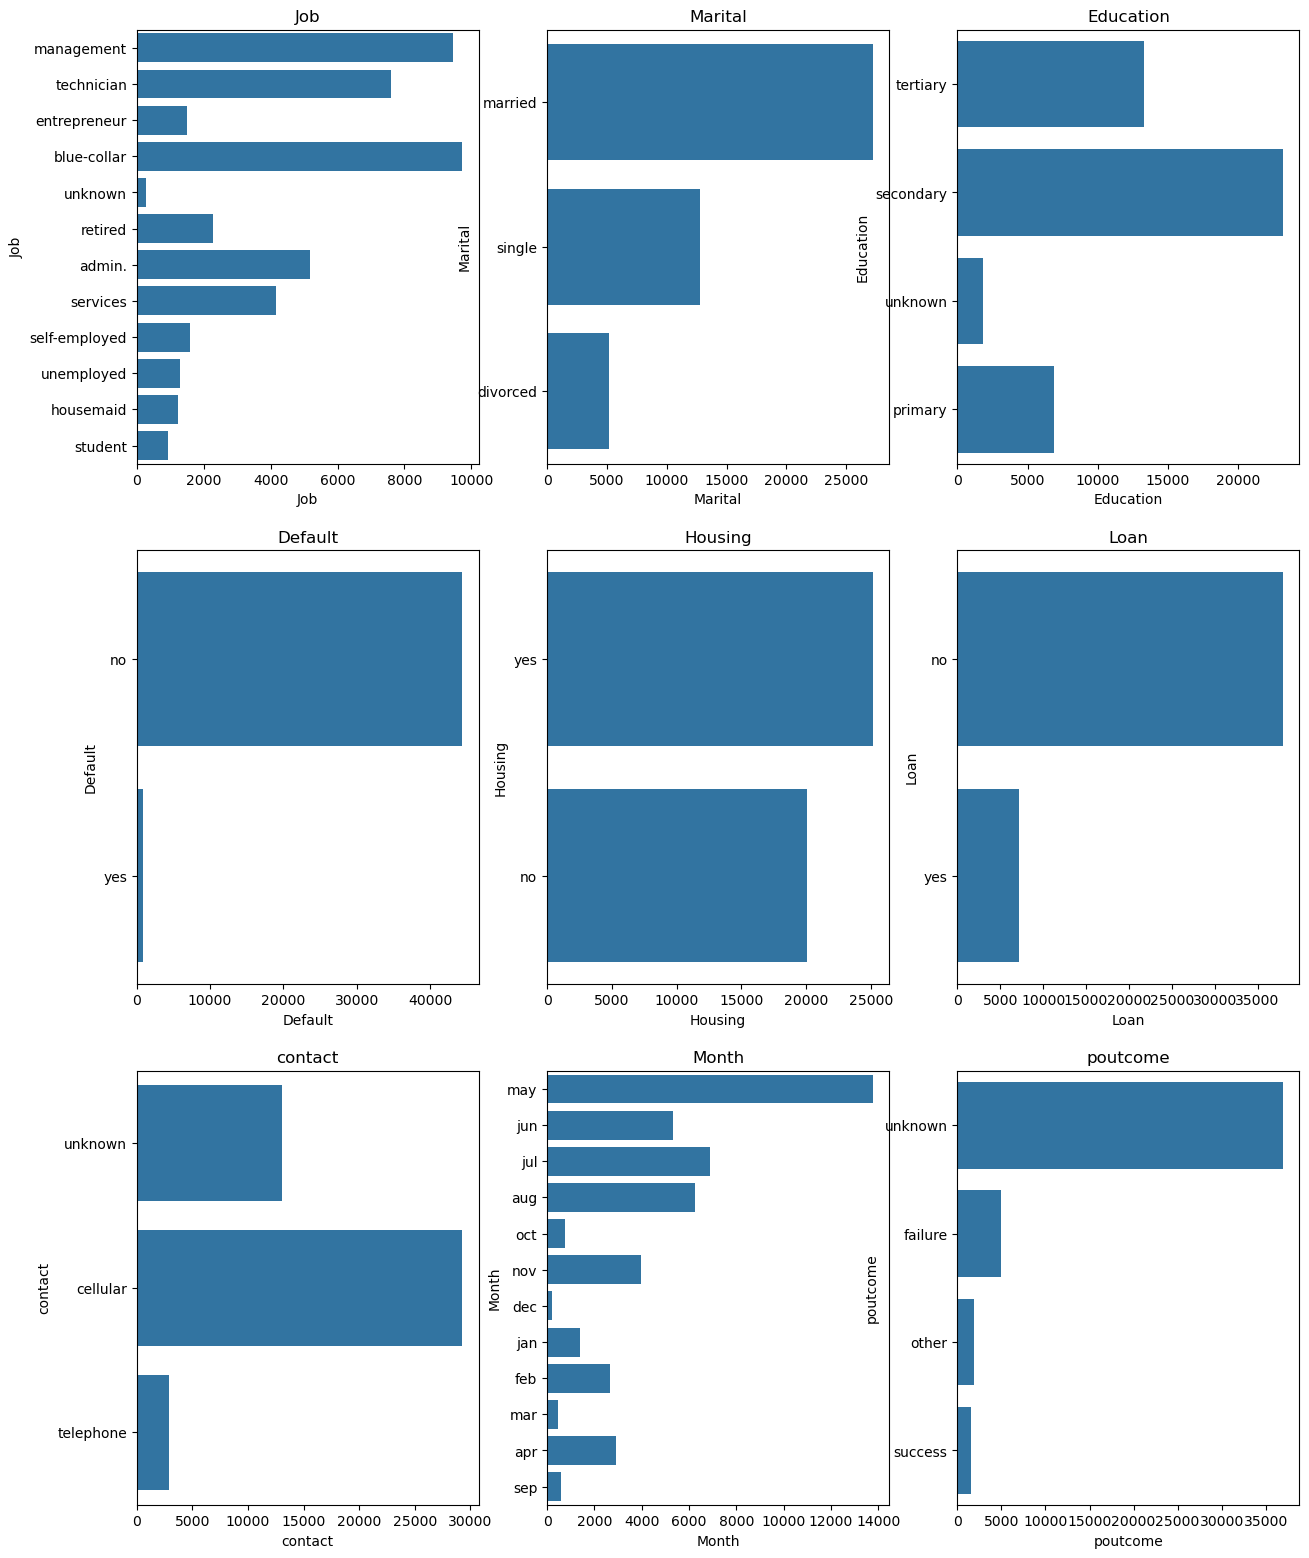

In [23]:
#5. Find Categorical Feature Distribution

#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

Take-away:

client with job type as BLUE RECORDS records are high in given dataset and STUDENT are very less

client who married are high in records in given dataset and divorced are less

client whose education background is secondary are in high numbers in given dataset

default feature seems to be does not play importand role as it has value of no at high ratio to value yes which can drop

data in month of may is high and less in dec

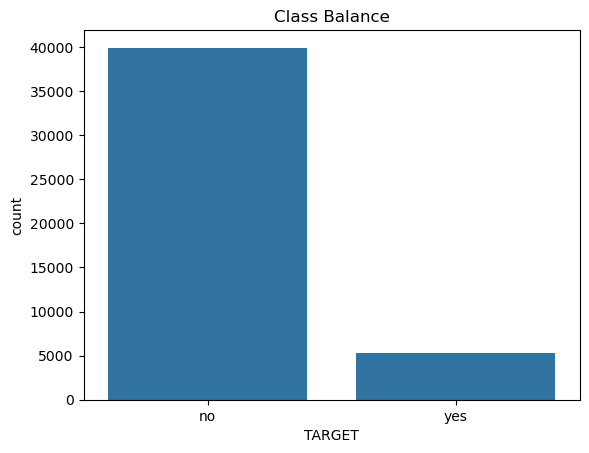

In [50]:
#6. Class Balance
sns.countplot(x='TARGET', data=df)
plt.title('Class Balance')
plt.show()


In [29]:
print(df['TARGET'].value_counts(normalize=True))

TARGET
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


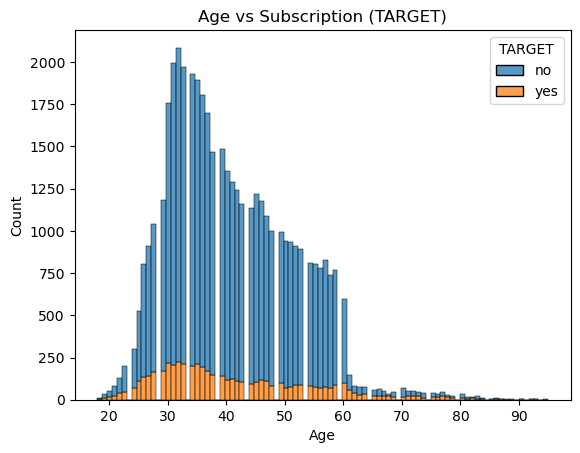

In [51]:
#7.  Relationship: age vs TARGET
sns.histplot(data=df, x='Age', hue='TARGET', multiple='stack')
plt.title("Age vs Subscription (TARGET)")
plt.show()

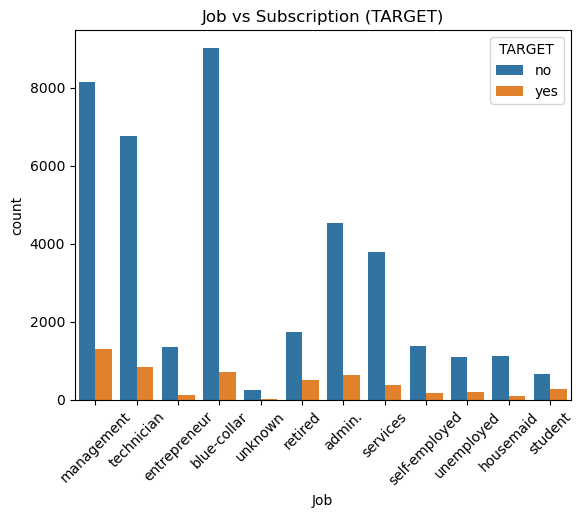

In [52]:
#8. Relationship: job vs TARGET
sns.countplot(data=df, x='Job', hue='TARGET')
plt.xticks(rotation=45)
plt.title("Job vs Subscription (TARGET)")
plt.show()

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve


**Preprocessing Pipeline**


In [55]:
# Separate features & target
X = df.drop('TARGET', axis=1)
y = df['TARGET'].map({'yes': 1, 'no': 0})

# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include='object').columns.tolist()

# Pipelines
# Numeric pipeline: Handle missing values (with median) and scale features (StandardScaler)
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
# Categorical pipeline: Handle missing values (with most frequent) and encode categories (OneHotEncoder)
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [56]:
# Column transformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [57]:
# 3️⃣ Train/Validation Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4️⃣ Baseline Model: Logistic Regression
baseline_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

baseline_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Balance', 'Day',
                                                   'Duration', 'Campaign',
                                                   'Pdays', 'Previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Job', 'Marital',
                                                   'Education', 'Default',
                                                   'Housing', 'Loan', 'contact',
                                                   'Month', 'poutcome'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [58]:
# Predictions
y_pred = baseline_model.predict(X_test)
y_proba = baseline_model.predict_proba(X_test)[:, 1]

# Metrics
print("Baseline Accuracy:", accuracy_score(y_test, y_pred))
print("Baseline F1 Score:", f1_score(y_test, y_pred))
print("Baseline ROC AUC:", roc_auc_score(y_test, y_proba))


Baseline Accuracy: 0.901249585314608
Baseline F1 Score: 0.4518109269490485
Baseline ROC AUC: 0.9055740146044154


In [63]:
# Improvement Step: Random Forest with Hyperparameter Tuning
# Reason: Random Forest handles non-linearity and feature interactions well and is less sensitive to outliers
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [64]:
# Hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [5, 10, None],
    'classifier__min_samples_split': [2, 5]
}
# Use GridSearchCV to find the best combination of hyperparameters based on F1 score

grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}


In [65]:
# Evaluate improved model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_proba_best = best_model.predict_proba(X_test)[:, 1]

print("Improved Accuracy:", accuracy_score(y_test, y_pred_best))
print("Improved F1 Score:", f1_score(y_test, y_pred_best))
print("Improved ROC AUC:", roc_auc_score(y_test, y_proba_best))

Improved Accuracy: 0.9083268826716797
Improved F1 Score: 0.5074272133095663
Improved ROC AUC: 0.9302812575090582


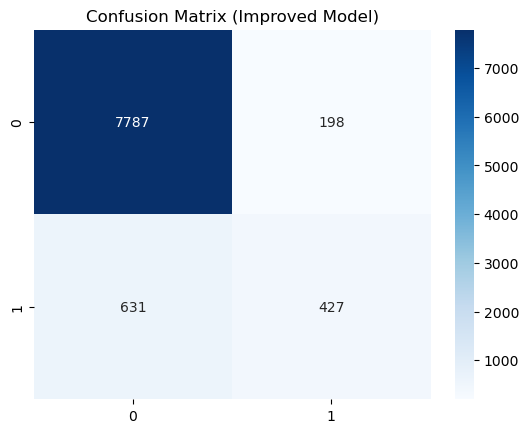

In [66]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Improved Model)")
plt.show()

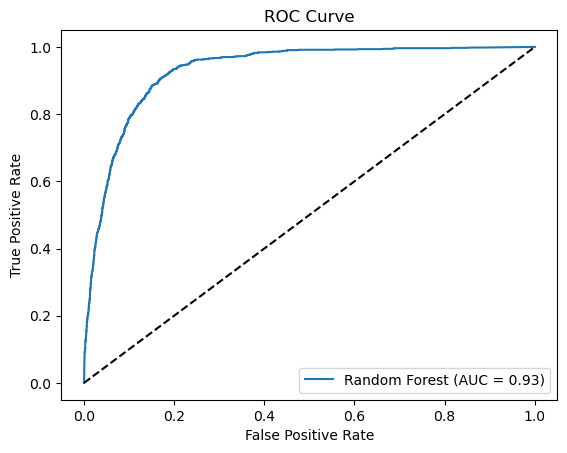

In [67]:
fpr, tpr, _ = roc_curve(y_test, y_proba_best)
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba_best)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()